In [3]:
import numpy as np
import matplot as plt
import pandas as pd
import seaborn as sns

In [9]:
from sklearn.datasets import load_boston

ModuleNotFoundError: No module named 'sklearn'

In [4]:
from sklearn.datasets import fetch_openml

boston_dataset = fetch_openml(data_id=531)


In [5]:
boston = pd.DataFrame(boston_dataset.data,columns = boston_dataset.feature_names)

In [6]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target

## Exploration

<module 'matplot' from 'C:\\Users\\saxen\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\matplot\\__init__.py'>

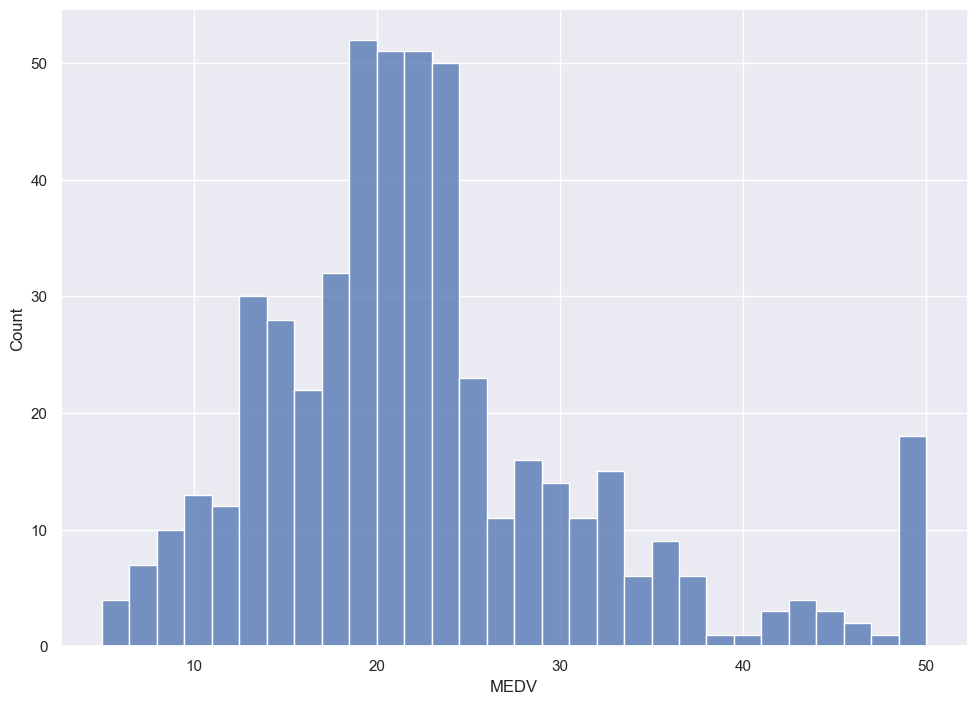

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(boston['MEDV'], bins=30)
plt

### Correlation Matrix

<Axes: >

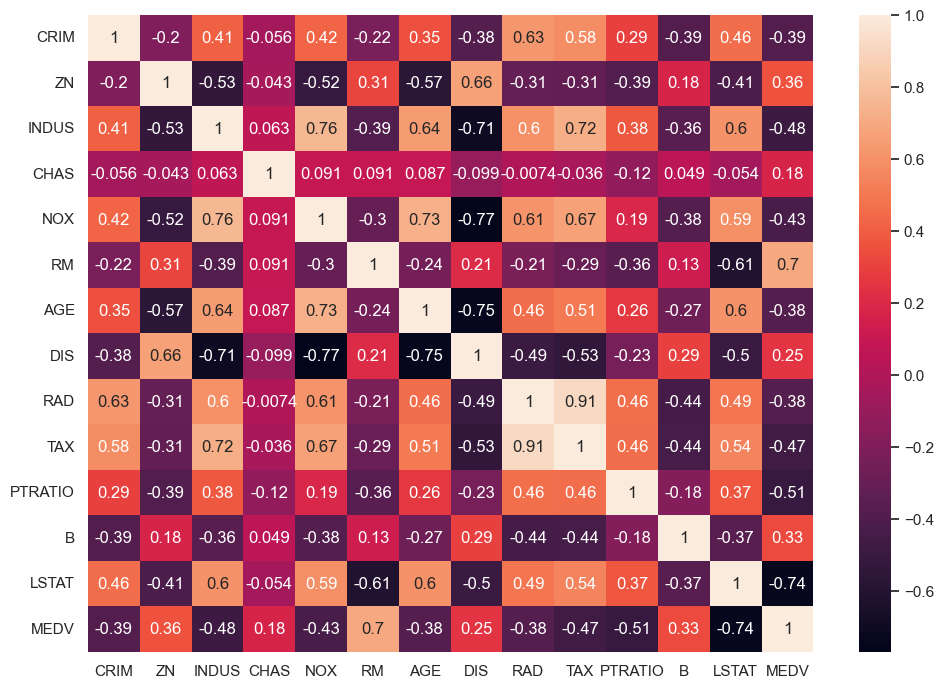

In [9]:
cm = boston.corr()
sns.heatmap(data = cm,annot = True)

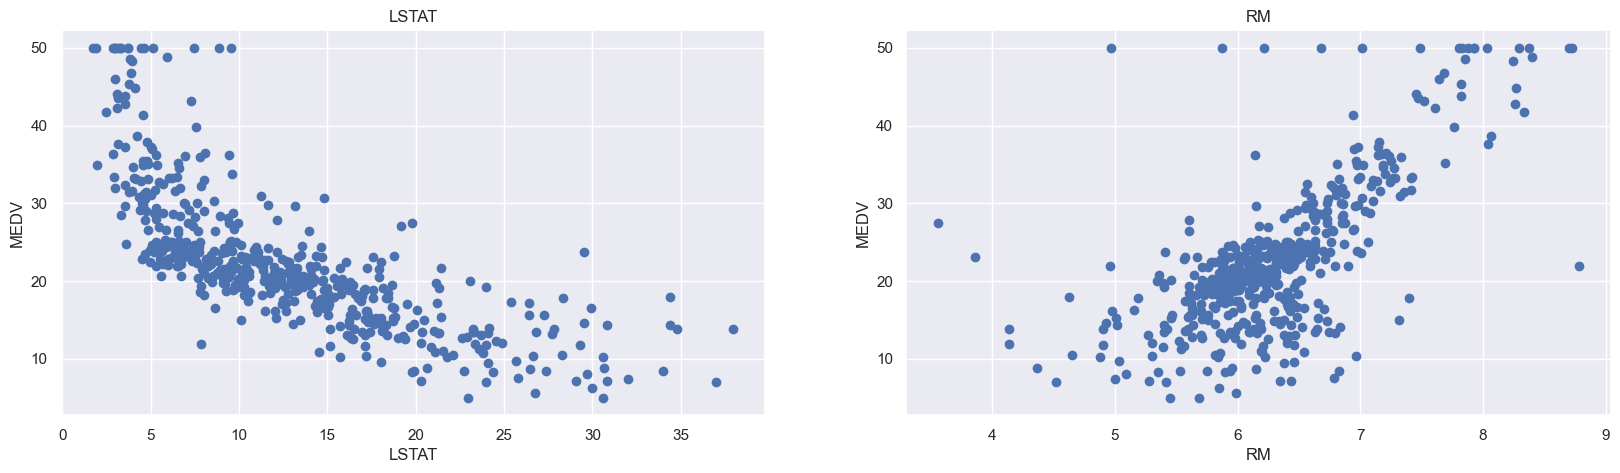

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [17]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [13]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
from sklearn.metrics import r2_score

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186952


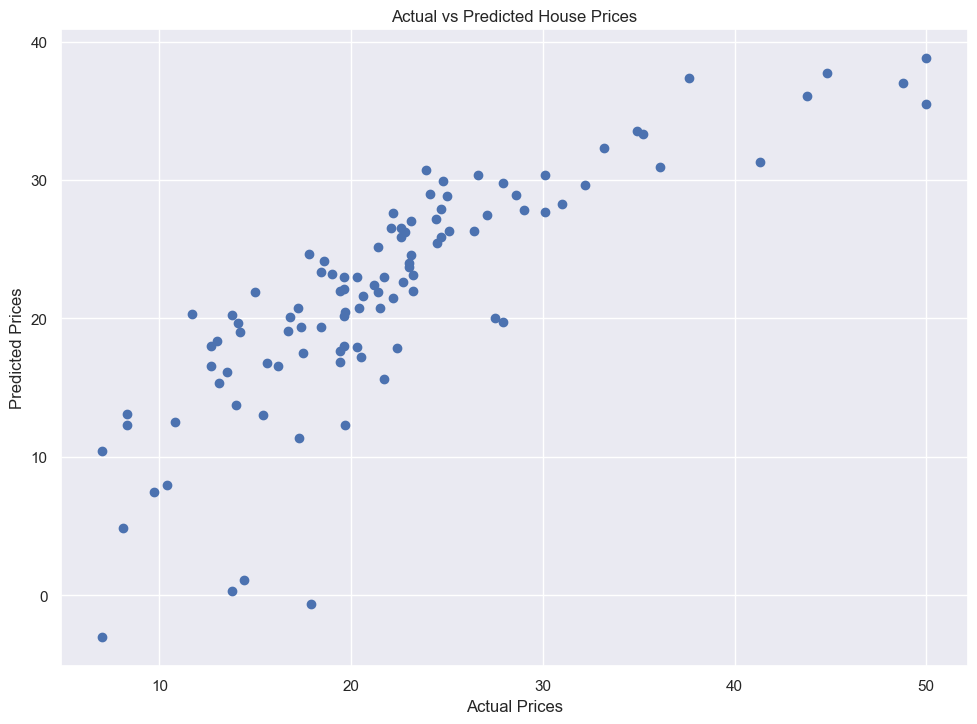

In [15]:
# Plotting actual vs predicted prices (optional)
plt.scatter(Y_test, y_test_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

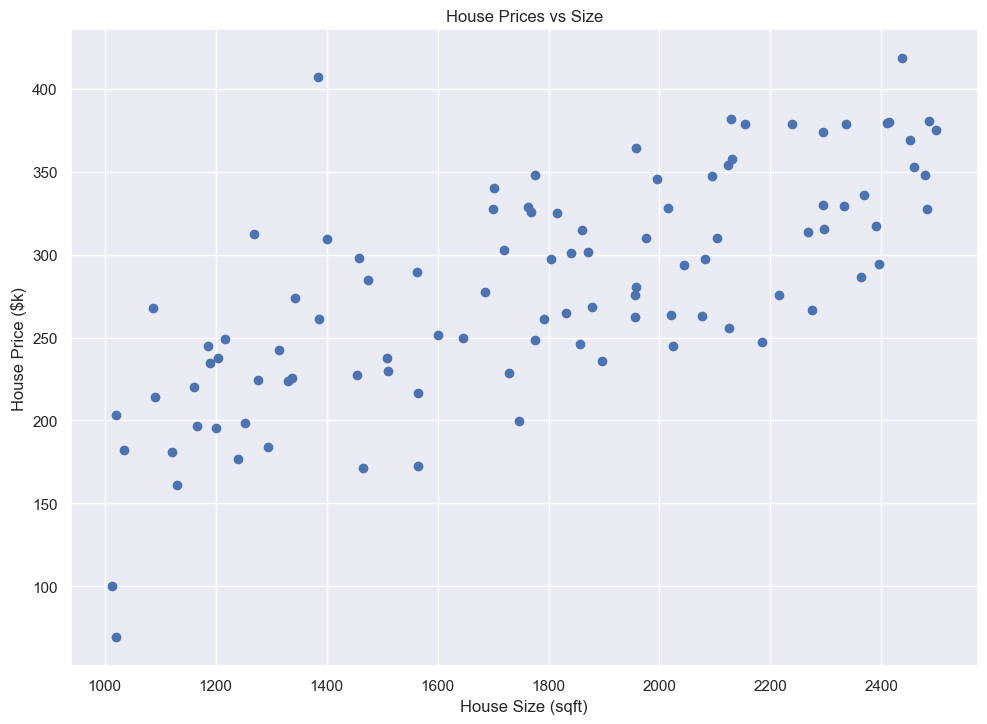

The predicted price for a 2000 sqft house is: $303.57k


In [16]:
# Generate synthetic data: house sizes (in square feet) and prices (in thousands of dollars)
np.random.seed(42)  # For reproducibility
house_sizes = np.random.randint(1000, 2500, 100)
house_prices = 100 + (house_sizes * 0.1) + (np.random.randn(100) * 50)  # Base price + size factor + noise

# Plotting the synthetic data
plt.scatter(house_sizes, house_prices)
plt.xlabel('House Size (sqft)')
plt.ylabel('House Price ($k)')
plt.title('House Prices vs Size')
plt.show()

# Preparing the data for linear regression
X = house_sizes.reshape(-1, 1)  # Features
y = house_prices  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the price of a house with 2000 sqft
predicted_price = model.predict([[2000]])
print(f"The predicted price for a 2000 sqft house is: ${predicted_price[0]:.2f}k")